In [2]:
%pylab inline
#%matplotlib qt
from __future__ import division # use so 1/2 = 0.5, etc.
import ssd
import scipy.signal as signal
from IPython.display import Audio, display
from IPython.display import Image, SVG

Populating the interactive namespace from numpy and matplotlib


In [3]:
pylab.rcParams['savefig.dpi'] = 100 # default 72
#pylab.rcParams['figure.figsize'] = (6.0, 4.0) # default (6,4)
#%config InlineBackend.figure_formats=['png'] # default for inline viewing
%config InlineBackend.figure_formats=['svg'] # SVG inline viewing
#%config InlineBackend.figure_formats=['pdf'] # render pdf figs for LaTeX

In [ ]:
from IPython.display import display
from sympy.interactive import printing
printing.init_printing(use_latex='mathjax')
import sympy as sym
x,y,z,a,b,c = sym.symbols("x y z a b c")

**A helper function**: Used to display complex numbers in rectangular or polar format and also in normal float or exponential display.

In [104]:
def cpx_fmt(z,mode1='rect',mode2='f',mode3='deg',d1=2,d2=4):
    """
    Helper function for printing formatted complex numbers as %d1.d2f and
    %d1.d2e. The function returns a string that can be displayed using print()
    
    s_out = cpx_fmt(z,mode1='rect',mode2='f',d1=2,d2=4)
    
    mode1 = 'rect' or 'polar' form
    mode2 = 'f' for floating or 'e' for exponential
    
    Mark Wickert January 2016
    """
    if mode1 == 'rect':
        if mode2 == 'f':
            mt = 'f'
        else:
            mt = 'e'
        if z.imag >= 0:
            s_o = '%'+str(d1)+'.'+str(d2)+mt+ ' + j%'+str(d1)+'.'+str(d2)+mt 
            s_out = s_o % (z.real,z.imag)
        else:
            s_o = '%'+str(d1)+'.'+str(d2)+mt+ ' - j%'+str(d1)+'.'+str(d2)+mt
            s_out = s_o % (z.real,abs(z.imag))
    else: # polar format otherwise
        if mode2 == 'f':
            mt = 'f'      
        else:
            mt = 'e'
        s_o = '%'+str(d1)+'.'+str(d2)+mt+ ' /_%'+str(d1)+'.'+str(d2)+mt
        if mode3 == 'deg':
            s_o += ' (deg)'
            s_out = s_o % (abs(z),angle(z)*180/pi)
        else:
            s_o += ' (rad)'
            s_out = s_o % (abs(z),angle(z))            
    return s_out

# Problem 1: Ulaby 1.13
The voltage of an electromagnetic wave traveling on a transmission line is given by
\begin{align}
    v(z,t) = 5e^{-\alpha z}\,\sin\big(4\pi\times 10^9 t - 20\pi z\big)
\end{align}
where $z$ is the distance in meters from the generator.
## Part a
Find the frequency, wavelength, and phase velocity of the wave.
* As the first step in the analysis we convert the wave to the standard cosine form using the fact that $\sin(\theta) = \cos(\theta - \pi/2)$
\begin{align}
    v(z,t) = 5e^{-\alpha z}\,\cos\big(4\pi\times 10^9 t - 20\pi z - \pi/2\big)
\end{align}
* Now, the frequency is $f = 4\pi\times 10^9/(2\pi) = 2$ (GHz)
* The wavelength is $2\pi/(20\pi) = 0.1 = 10$ cm
* The phase velocity is $u_p = f\lambda = 2\times 10^9 \cdot 0,1 = 2\times10^8$ m/s
0,t)
* **Note**: It must be that the wave is traveling in medium where $\epsilon_r >1$ and/or $\mu_r > 1$; e.g., A popular coax cable slows $u_P$ by about 2/3 the speed of light
## Part b
At $z=2$ m, the amplitude of the wave was measured to be 2 V. Find $\alpha$
* The wave attenuation factor is $e^{-\alpha\cdot 2}$ with
\begin{align}
    2 = 5\cdot e^{-\alpha\cdot 2}
\end{align}
so it must be that
\begin{align}
    \alpha = \frac{1}{2}\cdot \ln(5/2) = 0.458\quad\text{(Np/m)}
\end{align}

In [133]:
# Side calculations
1/2*log(5/2)

0.45814536593707755

# Problem 2: Ulaby 1.14
A certain electromagnetic wave is traveling in seawater was observed to have an amplitude of 98.02 V/m at a depth of 10 m, and an amplitude of 81.87 V/m at a depth of 100 m. What is the attenuation constant of seawater.
* Assuming a loss factor of $e^{-\alpha z}$, where $z$ is the depth in m, we form the ratio
\begin{align}
    \frac{E(10\text{ m})}{E(100\text{ m})}=\frac{98.02\text{ V/m}}{81.87\text{ V/m}} = \frac{E_0 e^{-\alpha 10}}{E_0 e^{-\alpha 100}}
\end{align}
where $E_0$ is the wave amplitude without attenuation
* We immediately see that $E_0$ cancels and we are left with
\begin{align}
    \frac{98.02\text{ V/m}}{81.87\text{ V/m}} = \frac{e^{-\alpha 10}}{e^{-\alpha 100}} = 
    e^{-\alpha(10-100)} = e^{\alpha 90}
\end{align}
* Solving for $\alpha$ yields
\begin{align}
    \alpha = \frac{1}{90}\cdot\ln(98.02/81.87) = 0.002\quad\text{(Np/m)}
\end{align}

In [141]:
# Side calculations
print('alpha = %1.2e (Np/m)' % (1/90*log(98.02/81.87),))
print('Check: E(100m) = %2.2f V/m' % (98.02*exp(-0.002*90),))

alpha = 2.00e-03 (Np/m)
Check: E(100m) = 81.87 V/m


# Problem 3
For complex variables $z_1 = 2+j3$ and $z_2 = 3\angle-150^\circ$ find in both rectangular
and polar form
\begin{align}
    z_3 = \frac{z_1\cdot z_2}{z_1 + z_2}
\end{align}

* Working this problem in Python (PyLab) and MATLAB is very straight forward as these tools have full complex arithmetic support
* Performing the calculation on a *smart* calculator such as the TI89 is also fairly easy
* Doing the calculation with a lesser calculator is more work, but not impossible
* Using PyLab the answer is:

In [108]:
# To run this code be shure to run the function cpx_format first
z1 = 2 + 3j
z2 = 3*exp(-1j*150*pi/180)
z3 = z1*z2/(z1+z2)
print('Inputs')
print('z1 (rect) = ' + cpx_fmt(z1,'rect','f',d1=1,d2=2))
print('z2 (rect) = ' + cpx_fmt(z2,'rect','f',d1=1,d2=2))
print('Outputs')
print('z3 (rect) = ' + cpx_fmt(z3,'rect','f',d1=1,d2=2))
print('z3 (rect) = ' + cpx_fmt(z3,'polar','f',d1=1,d2=2))

Inputs
z1 (rect) = 2.00 + j3.00
z2 (rect) = -2.60 - j1.50
Outputs
z3 (rect) = -6.05 + j2.88
z3 (rect) = 6.70 /_154.57 (deg)


* On an exam or quiz you will need to use a calculator, such as a TI89 (what I use) or maybe a TI84 (from High School)
* In any case, these calculators have built-in complex arithmetic functions and complex numbers may be entered directly in rectangular or polar form
* Screen shots below give the problem solution on a TI89:

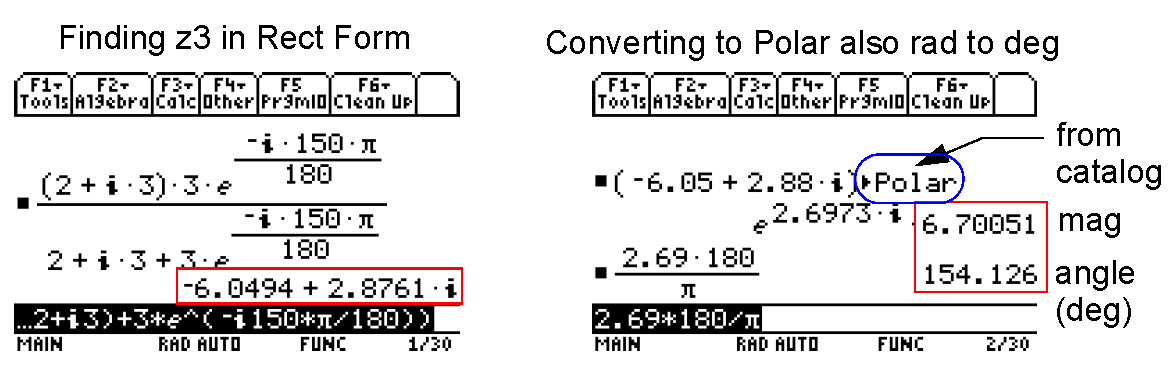

In [97]:
Image('set2_p3.png',width='90%')

# Problem 4: Ulaby 1.26a
Find the phasors for the following time functions:

## Part a
The waveform is $v(t)=9\cos(\omega t - \pi/3)$ (V)

* Since $v(t)$ is already in cosine form, we can write by inspection that
\begin{align}
    \tilde{V} = 9e^{-j\pi/3}\quad\text{(V)}
\end{align}

# Problem 5: Ulaby 1.27a
Find the instantaneous time sinusoidal functions corresponding to the folowing phasors.

## Part a

The phasor is $\tilde{V} = -5e^{j\pi/3}$ (V)

* To handle the -5 we need to represent it as $-5 = 5e^{\pm\pi}$, then
\begin{align}
    \tilde{V} = -5e^{j\pi/3} \overset{\text{also}}{=} 5e^{j(\pi/3\pm \pi)}\quad\text{(V)}
\end{align}
and
\begin{align}
    v(t) = 5\cos\big(\omega t - 2\pi/3\big) = 5\cos\big(\omega t + 4\pi/3\big)\quad\text{(V)}
\end{align}

# Problem 6: Ulaby 1.29
The voltage source of the circuit shown below is given by
\begin{align}
    v_s(t) = 25\cos(4\times 10^4 t - 45^\circ)
\end{align}

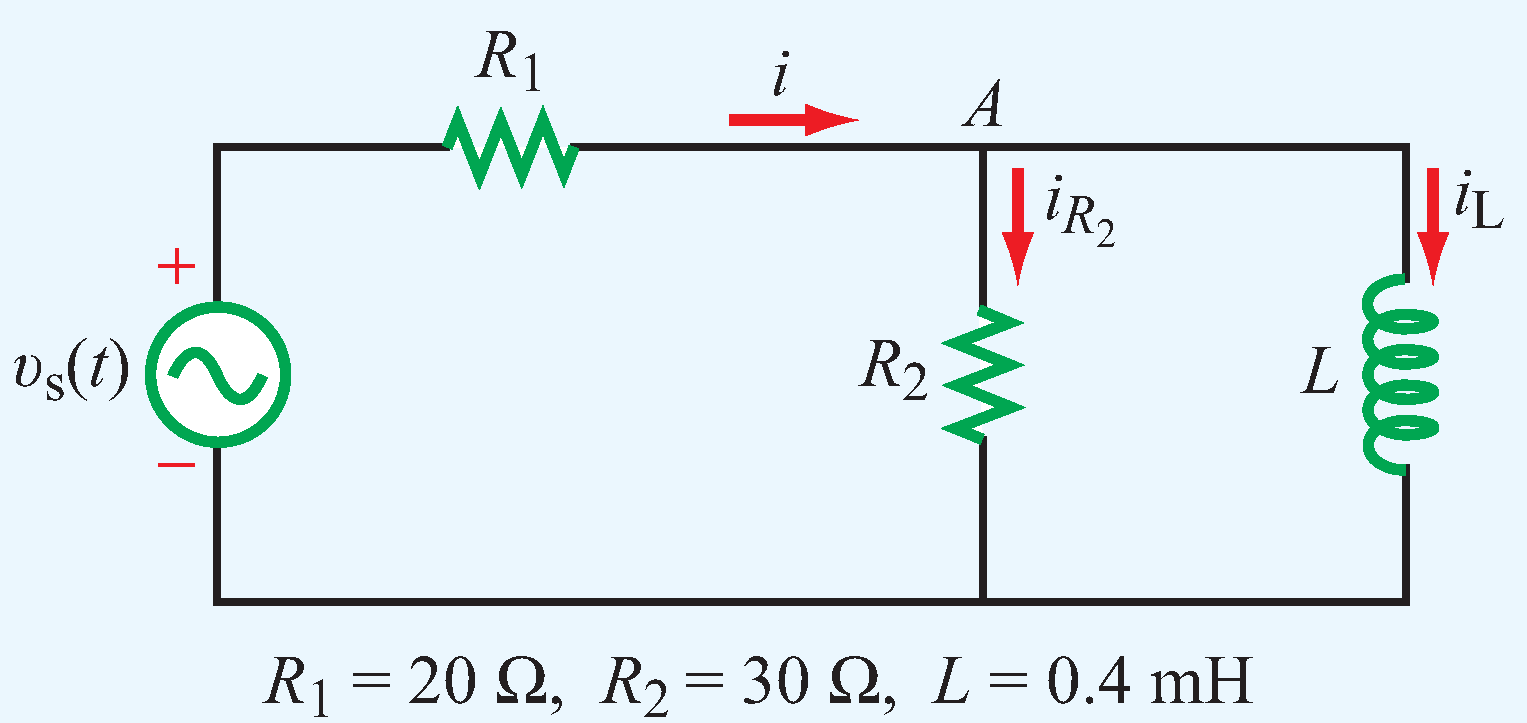

In [132]:
Image('SET2_PROB6a.png',width='60%')

Obtain the current flowing through the inductor, $i_L$

* To solve for $i_L(t)$ we work in the $s$-domain as the notation is a little easier
* Conversion back to the phasor quantity $\tilde{I}_L$ and then the waveform $i_L(t)$ will occur last
* In the circuit shown above there are serveral options available
* The approach taken here is to first find $V_A(s)$ using a voltage divider relationship and then find $I_L(s)$ by dividing by $z_L = Ls$
\begin{align}
    V_A(s) &= V_s(s) \frac{R_2 || Ls}{R_1 + (R_2 || Ls)} \\
    &= V_s(s)\cdot \frac{R_2 L s}{R_1R_2 + (R_1+R_2)Ls}
\end{align}
so
\begin{align}
    I_L(s) &= \frac{V_A(s)}{Ls} = V_s(s)\cdot \frac{R_2}{R_1R_2 + (R_1+R_2)Ls}
\end{align}
* We now convert to phasor form by setting $s = j\omega = j4\times 10^4$ and insert component values
* Note $\tilde{V}_s = 25\angle -25^\circ = 25 e^{-j45/180\cdot\pi} = 25 e^{-j0.7854}$
\begin{align}
    \tilde{I}_L &= \tilde{V}_s\cdot \frac{R_2}{R_1R_2 + j\omega(R_1+R_2)L} \\
    &= 25 e^{-j0.4363}\cdot \frac{30}{600 +j4\times 10^4\cdot 50\cdot 0.4 \times 
    10^{-3}} \\
    &= 25 e^{-j0.7854}\cdot \frac{30}{600+j800} = 25 e^{-j0.7854}\cdot 
    0.03 e^{-j0.9273} \\
    &= 0.75e^{-j1.7127} = 0.75e^{-j98.13^\circ}
\end{align}

In [121]:
# Side calculations
print(cpx_fmt(25*exp(-1j*45/180*pi),'polar',mode3='rad'))
print(cpx_fmt(30/(600 + 1j*50*.4e-3*4e4)))
print(cpx_fmt(30/(600 + 1j*50*.4e-3*4e4),'polar','f','rad'))
print(cpx_fmt(25*exp(-1j*45/180*pi)* 30/(600 + 1j*50*.4e-3*4e4),'polar','f','rad'))
print(cpx_fmt(25*exp(-1j*45/180*pi)* 30/(600 + 1j*50*.4e-3*4e4),'polar','f','deg'))

25.0000 /_-0.7854 (rad)
0.0180 - j0.0240
0.0300 /_-0.9273 (rad)
0.7500 /_-1.7127 (rad)
0.7500 /_-98.1301 (deg)


* Back into the time domain we finally have
\begin{align}
    i_L(t) = 0.75\cos(4\times 10^4 t - 98.13^\circ)
\end{align}

* We can check the hand claculation using AC analysis in LTspice

In [127]:
# The Operating frequency in Hz
print('f = %4.2f Hz' % (4e4/(2*pi),))

f = 6366.20 Hz


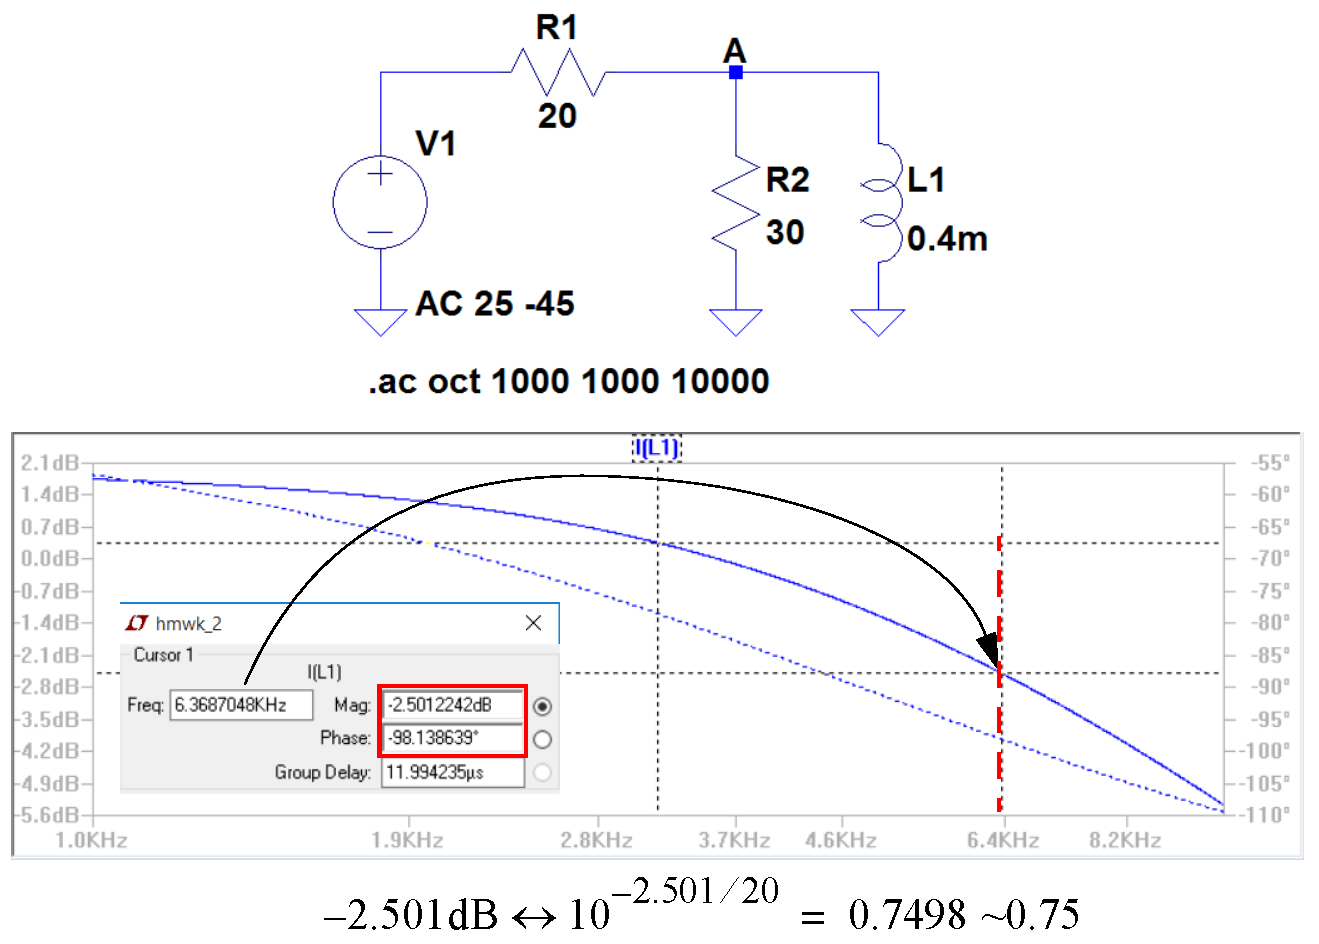

In [131]:
Image('SET2_PROB6b.png',width='90%')

* When the cursor in the LTspice plot of $I_L$ is moved to near 6.366 kHz, the magnitude and phase are in close agreement with the hand calculation!